In [1]:
library(ouija)
library(ggplot2)
library(SingleCellExperiment)

Loading required package: Rcpp
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, pa

In [4]:
options(mc.cores = parallel::detectCores())

In [5]:
data(example_gex)
print(dim(example_gex))
example_gex[1:3, ]

[1] 400  11


switch_1,switch_2,switch_3,switch_4,switch_5,switch_6,switch_7,switch_8,switch_9,transient_1,transient_2
0.000000,6.584901,0.000000,6.272541,12.34626,3.371506,2.712104,2.624922,10.039922,0,0.000000
7.261585,9.766147,6.902371,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000
4.605835,1.452838,0.000000,8.157470,14.55081,6.789900,9.762273,9.125681,8.999462,0,4.836451


In [13]:
write.csv(example_gex, 'example.csv', row.names = FALSE)

In [6]:
pca <- prcomp(example_gex)

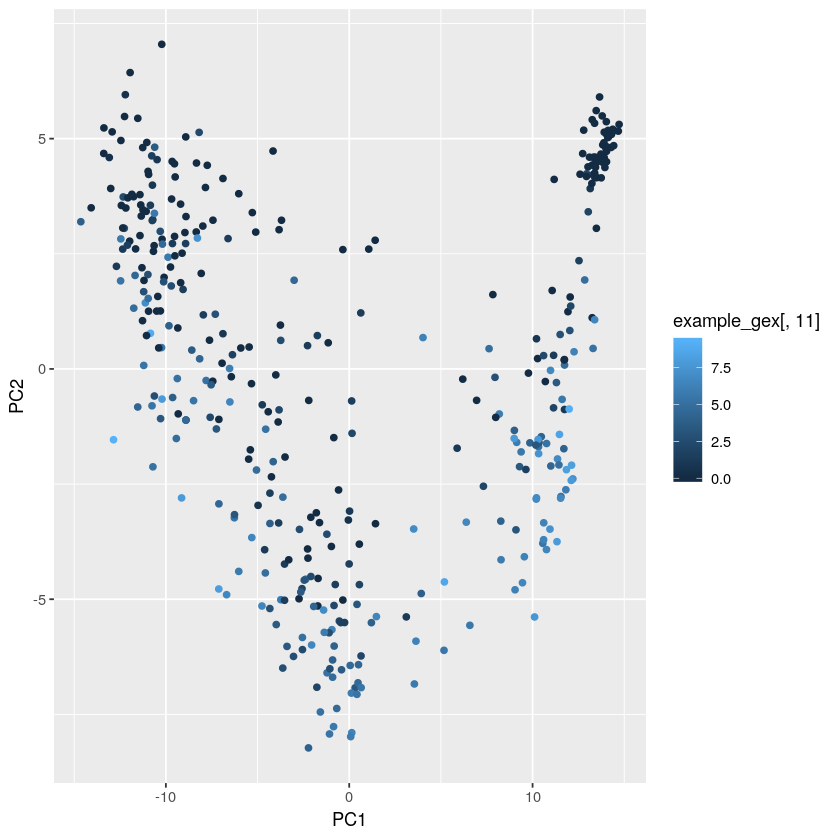

In [19]:
ggplot(as.data.frame(pca$x), aes(PC1, PC2, color = example_gex[, 11])) +
    geom_point()

In [8]:
single_cell_set <- SingleCellExperiment(assays = list(logcounts = t(example_gex)))

In [9]:
response_type <- sapply(strsplit(colnames(example_gex), "_"), `[`, 1)
response_type

[1] "switch"    "switch"    "switch"    "switch"    "switch"    "switch"   
 [7] "switch"    "switch"    "switch"    "transient" "transient"

In [14]:
oui <- ouija(example_gex, response_type, iter = 4000)

recompiling to avoid crashing R session



SAMPLING FOR MODEL 'ouija' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.004656 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 46.56 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 544.184 seconds (Warm-up)
Chain 1:                405.856 seconds (Sampling)
Chain 1:                950

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”

In [52]:
oui <- ouija(example_gex[sample(seq_len(nrow(example_gex)), 200), ], 
             response_type, iter = 500)

recompiling to avoid crashing R session



SAMPLING FOR MODEL 'ouija' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.002306 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 23.06 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 500 [  0%]  (Warmup)
Chain 1: Iteration:  50 / 500 [ 10%]  (Warmup)
Chain 1: Iteration: 100 / 500 [ 20%]  (Warmup)
Chain 1: Iteration: 150 / 500 [ 30%]  (Warmup)
Chain 1: Iteration: 200 / 500 [ 40%]  (Warmup)
Chain 1: Iteration: 250 / 500 [ 50%]  (Warmup)
Chain 1: Iteration: 251 / 500 [ 50%]  (Sampling)
Chain 1: Iteration: 300 / 500 [ 60%]  (Sampling)
Chain 1: Iteration: 350 / 500 [ 70%]  (Sampling)
Chain 1: Iteration: 400 / 500 [ 80%]  (Sampling)
Chain 1: Iteration: 450 / 500 [ 90%]  (Sampling)
Chain 1: Iteration: 500 / 500 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 66.9187 seconds (Warm-up)
Chain 1:                14.9856 seconds (Sampling)
Chain 1:                81.9043 seconds (Total)
Cha

Warning message:
“The largest R-hat is 1.22, indicating chains have not mixed.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#r-hat”Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”

In [15]:
print(oui)

A Ouija fit with 400 cells and 11 marker genes 
Inference type:  Hamiltonian Monte Carlo 
MCMC info: 4000 iterations on 1 chains 
(Gene behaviour) Switch/transient: 9 / 2

Warning message:
“Ignoring unknown parameters: fun”

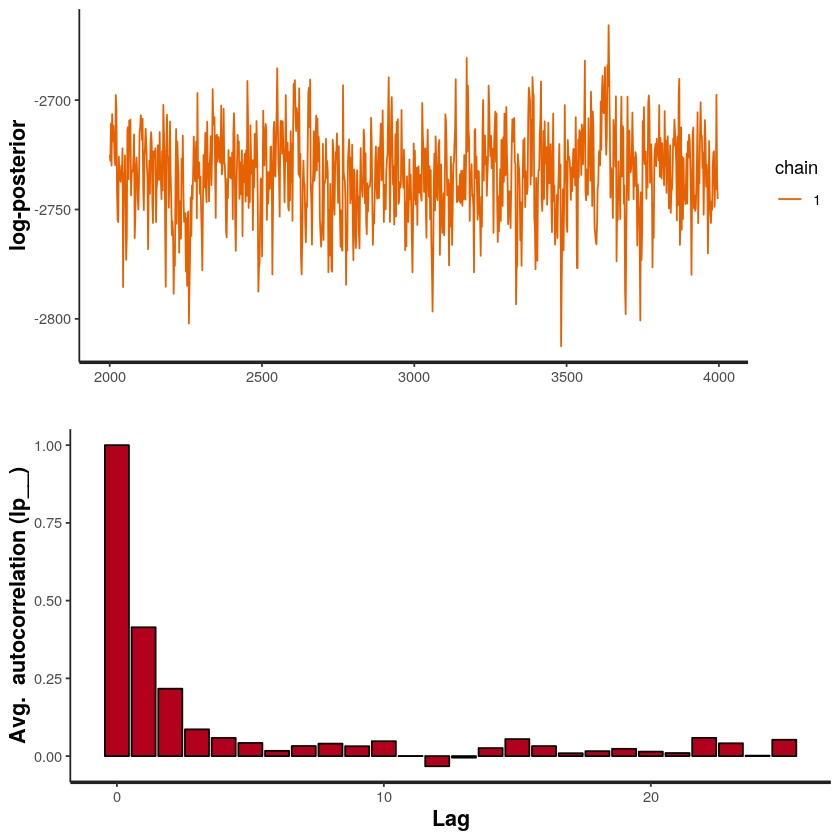

In [16]:
plot_diagnostics(oui)

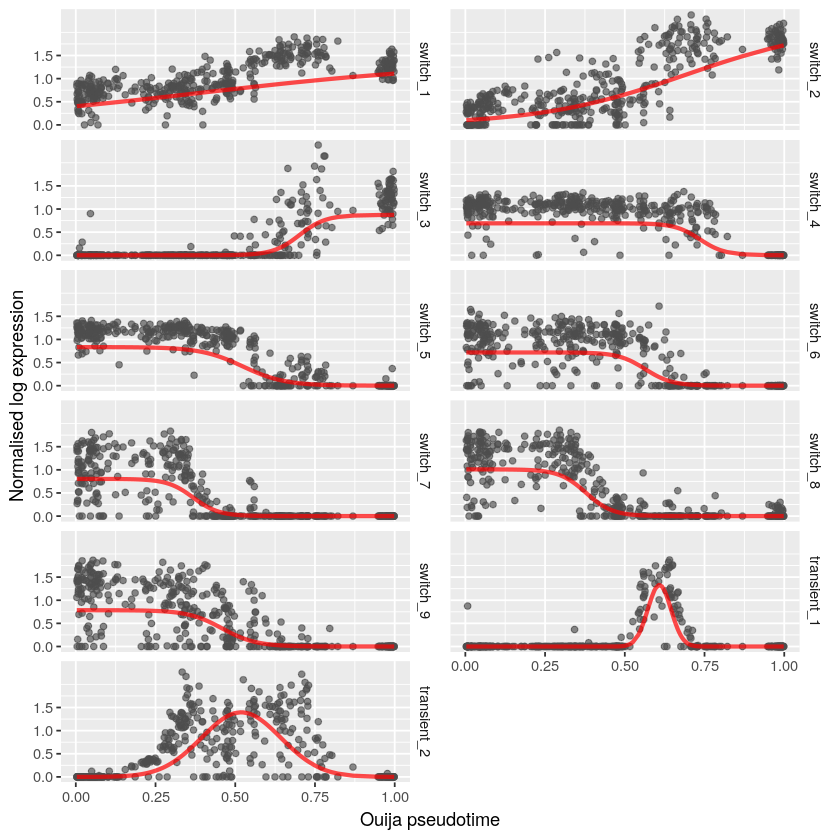

In [17]:
plot_expression(oui)

In [26]:
divergent <- get_sampler_params(oui$fit, inc_warmup=FALSE)[[1]][,'divergent__']
sum(divergent)

[1] 0

In [28]:
tmap <- map_pseudotime(oui) # MAP pseudotimes
t0map <- switch_times(oui) # MAP switch times
pmap <- peak_times(oui) # MAP peak times
kmap <- switch_strengths(oui) # MAP switch strengths

In [31]:
pmap

var1      var2 
0.6084576 0.5185848

In [32]:
t0map

var1      var2      var3      var4      var5      var6      var7      var8 
0.3900766 0.6922284 0.7011166 0.7355072 0.5235458 0.5637614 0.3678896 0.3780449 
     var9 
0.4585612

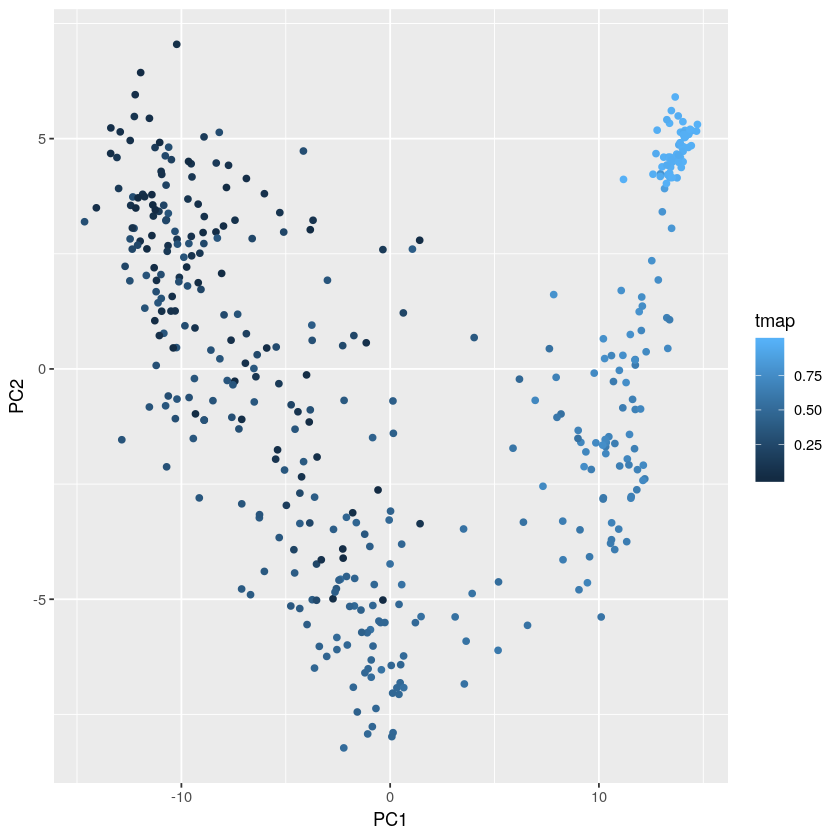

In [30]:
ggplot(as.data.frame(pca$x), aes(PC1, PC2, color = tmap)) +
    geom_point()